<a href="https://colab.research.google.com/github/amf599-cyber/Au25_Phys434_Data_Analysis_Lab/blob/main/LAB1/lab_1_AlexFeucht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Data Analysis with HTRU2 Dataset

**Author:** Alex Feucht, editing template from Linda Jin  
**Course:** Physics 434 - Data Analysis Lab  
**Objective:** Learn statistical analysis, probability calculations, and data visualization using real pulsar survey data.

## Overview

In this laboratory, we will:
1. Set up git & GitHub for version control
2. Analyze pulsar candidates from the High Time Resolution Universe Survey (HTRU2) dataset
3. Practice statistical analysis and probability calculations
4. Create data visualizations and interpret results

**Key Learning Outcomes:**
- Understanding of statistical distributions
- Bayes' theorem application
- Data visualization with histograms
- Probability calculations with real data

## Step 1: Import Required Libraries

Import the necessary Python libraries for data analysis and visualization.

**TODO:** Import pandas, matplotlib.pyplot, numpy, and scipy.stats

`COLAB` determines whether this notebook is running on Google Colab. If you're running locally, make sure to download all data in this work directory.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
COLAB = 'google.colab' in str(get_ipython())

if COLAB:
# clone github repo
  !git clone --depth 1 https://github.com/amf599-cyber/Au25_Phys434_Data_Analysis_Lab.git
  %cd Au25_Phys434_Data_Analysis_Lab/

Cloning into 'Au25_Phys434_Data_Analysis_Lab'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 2), reused 7 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 859.58 KiB | 4.02 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/Au25_Phys434_Data_Analysis_Lab


In [2]:
# TODO: Import the required libraries
# Hint: You'll need pandas, matplotlib.pyplot, numpy, and scipy.stats, from scipy.stats import norm (used later)

# Your imports here:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

## Step 2: Load and Explore the Dataset

The HTRU2 dataset contains 17,898 pulsar candidates with 8 features each. The last column indicates the class:
- **Class 0**: RFI/Noise (fake signals)
- **Class 1**: Real pulsar signals

**Features (first 4 are from integrated pulse profile):**
1. Mean of the integrated profile
2. Standard deviation of the integrated profile  
3. Excess kurtosis of the integrated profile
4. Skewness of the integrated profile
5-8. Mean, std dev, excess kurtosis, and skewness of the DM-SNR curve

**TODO:** Load the dataset and separate it into two classes

In [3]:
# Load the HTRU2 dataset
# TODO: Read the CSV file using pandas
# df = pd.read_csv(...)

# Separate the data into two classes based on the last column
# TODO: Create class_0_data (RFI/Noise) and class_1_data (Real Pulsar)
# Hint: Use boolean indexing with df.iloc[:, -1]

# pulsar_data =
# noise_data =

# Print the number of samples in each class
# TODO: Print the lengths of both classes

# Your code here:

In [4]:
# Read in the HTRU data set (has no header, all data)
df = pd.read_csv('htru2/HTRU_2.csv', header=None)

# Define the column names to use for readability
column_names = [
    "Mean of the integrated profile",
    "Standard deviation of the integrated profile",
    "Excess kurtosis of the integrated profile",
    "Skewness of the integrated profile",
    "Mean of the DM-SNR curve",
    "Standard deviation of the DM-SNR curve",
    "Excess kurtosis of the DM-SNR curve",
    "Skewness of the DM-SNR curve",
    "Classification"
]

# Append data with listed column names
df.columns = column_names

# Display the first few rows with the new headers (for testing)
# display(df.head())

# Separate the data into two classes based on the last column
pulsar_data = df[df.iloc[:, -1] == 1]
noise_data = df[df.iloc[:, -1] == 0]

# Print the readouts of the last column counts
print(f"Number of samples in class 0 (RFI/Noise): {len(noise_data)}")
print(f"Number of samples in class 1 (Real Pulsar): {len(pulsar_data)}")
print(f"Total samples: {len(noise_data)+len(pulsar_data)}")

Number of samples in class 0 (RFI/Noise): 16259
Number of samples in class 1 (Real Pulsar): 1639
Total samples: 17898


## Step 3: Feature Analysis and Visualization

**Objective:** Compare the distribution of features between RFI/noise and real pulsar signals.

**Requirements:**
- Create histograms for each feature (focus on the first 4 features from integrated pulse profile)
- Plot both classes on the same graph with different colors and line styles
- Normalize histograms so the area equals 1 (use `density=True`)
- Use the same bin ranges and widths for fair comparison
- Include mean and standard deviation in legends
- Proper axis labels and titles

**TODO:** Create histograms comparing the two classes for each feature

In [5]:
# Create histograms for the first 4 features (integrated pulse profile features)

# TODO: Loop through the first 4 columns of the dataset
# for i, feature_name in enumerate(df.columns): noise_feature = noise_data[feature_name]
#     noise_feature = noise_data[feature_name]
#     pulsar_feature = pulsar_data[feature_name]
#
#     # Create figure
#     fig, ax = plt.subplots(figsize=(10, 6))
#     ax.hist(noise_feature ...
#     ax.hist(pulsar_feature ...
#     ax.set_title(f"Histogram of {feature_name}")
#     ax.set_xlabel("Value")
#     ax.set_ylabel("Frequency")
#     ax.legend()
#     plt.show()
#     pass  # Remove this line when you add your code

# Your code here:

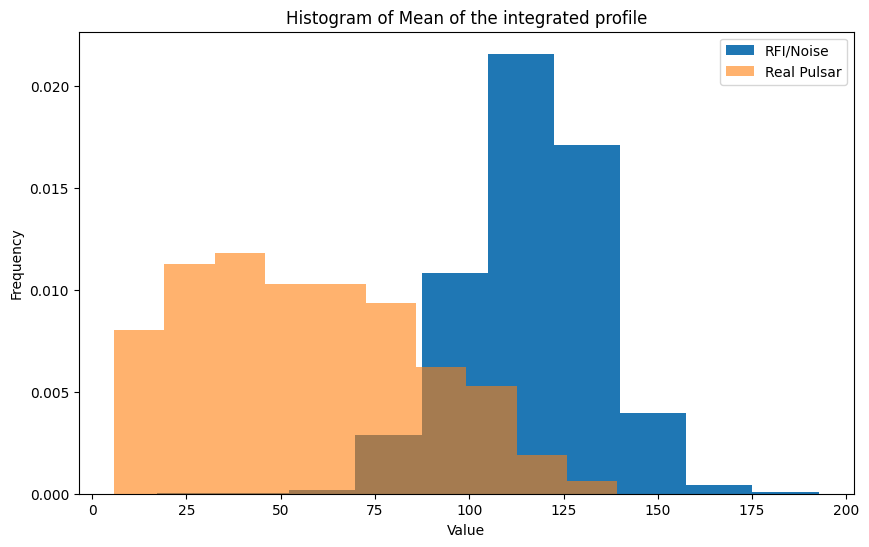

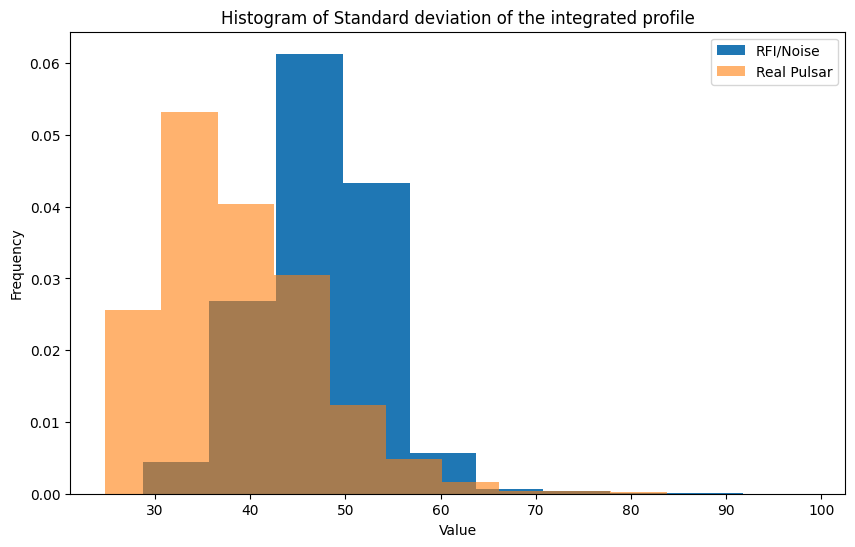

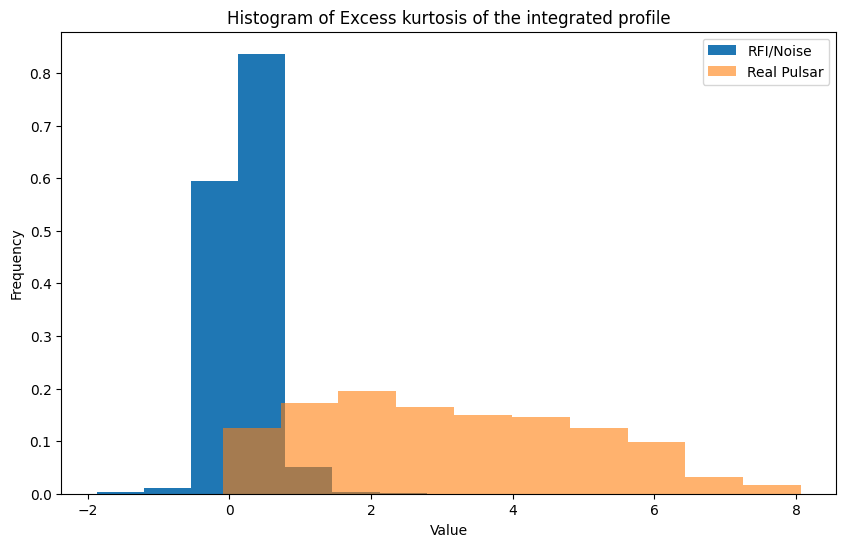

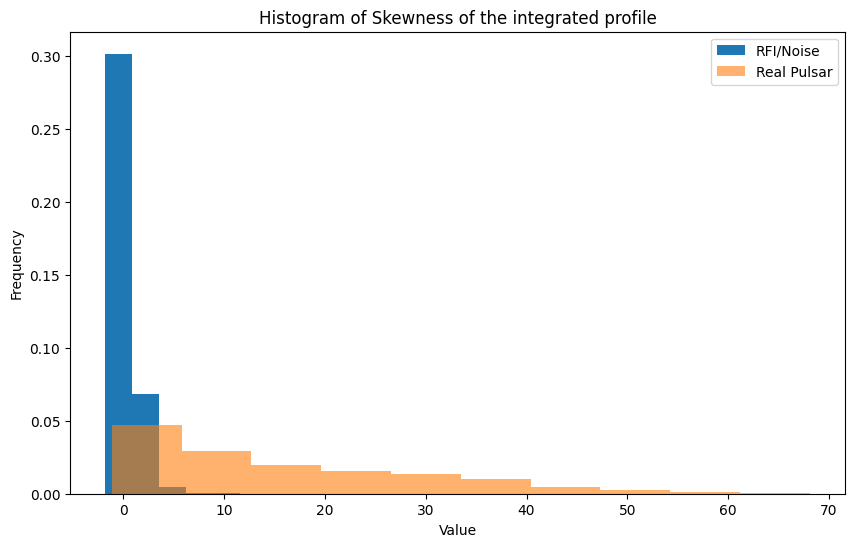

In [6]:
# Creates a for loop to read only data in the first 4 columns into histogram plots
for i, feature_name in enumerate(df.columns[:4]):
  noise_feature = noise_data[feature_name]
  pulsar_feature = pulsar_data[feature_name]

  # Create figures
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.hist(noise_feature, density=True, label=f'RFI/Noise')
  ax.hist(pulsar_feature, density=True, alpha=0.6, label=f'Real Pulsar')
  ax.set_title(f"Histogram of {feature_name}")
  ax.set_xlabel("Value")
  ax.set_ylabel("Frequency")
  ax.legend()
  plt.show()

## Step 4: Probability Calculations

**Objective:** Calculate basic probabilities and apply Bayes' theorem.

**Define Events:**
- **Event A:** An observation is a pulsar candidate (class = 1)
- **Event B:** Mean of the integrated profile < 80

**Calculate the following probabilities:**
1. P(A) - Probability that a randomly chosen observation is a real pulsar
2. P(B) - Probability that mean of integrated profile < 80
3. P(A ∩ B) - Probability that both conditions are satisfied

**TODO:** Calculate the three basic probabilities

In [7]:
# Calculate P(A): Probability that an observation is a pulsar candidate
# TODO: Calculate the ratio of class 1 samples to total samples

# Calculate P(B): Probability that mean of integrated profile < 80
# TODO: Count how many samples have the first feature < 80
# Hint: Use boolean indexing on df.iloc[:, 0] < 80

# Calculate P(A ∩ B): Probability that both conditions are satisfied
# TODO: Count samples that are both class 1 AND have first feature < 80
# Hint: Filter class_1_data where first column < 80

# Your code here:

In [8]:
# pulsar_probability = Pulsar Sample Number / Total Sample Number
pulsar_probability = len(pulsar_data) / len(df)
print("P(A) = ", pulsar_probability)

# count_less_than_80 = length of all samples with the column value [0] with boolean index less than 80
count_less_than_80 = len(df[df.iloc[:, 0] < 80])

# prob_less_than_80 = the number of samples less than 80 divided by total number of samples
prob_less_than_80 = count_less_than_80 / len(df)
print("P(B) = ", prob_less_than_80)

# prob_both_conditions = probaility of pulsars * probability of mean integrated < 80
prob_both_conditions = pulsar_probability * prob_less_than_80
print("P(A ∩ B) = ", prob_both_conditions)

P(A) =  0.09157447759526204
P(B) =  0.08626662196893507
P(A ∩ B) =  0.007899820840713185


## Step 5: Conditional Probabilities (Bayes' Theorem)

**Objective:** Calculate conditional probabilities using Bayes' theorem.

**Bayes' Theorem Formula:**
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

**Calculate:**
1. **P(A|B)**: Given that mean of integrated profile < 80, what's the probability it's a real pulsar?
2. **P(B|A)**: Given that it's a real pulsar, what's the probability that mean < 80?

**TODO:** Apply Bayes' theorem to calculate conditional probabilities

In [9]:
# TODO: Calculate P(A|B) = P(A ∩ B) / P(B)
# This answers: "Given mean < 80, what's the probability it's a real pulsar?"

# TODO: Calculate P(B|A) = P(A ∩ B) / P(A)
# This answers: "Given it's a real pulsar, what's the probability that mean < 80?"

# Your code here:

In [10]:
# conditional_prob_A_given_B = Probability of both / probability < 80
conditional_prob_A_given_B = prob_both_conditions / prob_less_than_80
print('P(A | B) = P(A ∩ B) / P(B) = ', conditional_prob_A_given_B)

# conditional_prob_B_given_A = Probability of both / probability sample is pulsar
conditional_prob_B_given_A = prob_both_conditions / pulsar_probability
print('P(B | A) = P(A ∩ B) / P(A) = ', conditional_prob_B_given_A)

P(A | B) = P(A ∩ B) / P(B) =  0.09157447759526204
P(B | A) = P(A ∩ B) / P(A) =  0.08626662196893507


## Step 6: Standard Normal Distribution Analysis

**Objective:** Understand different types of probabilities for the standard normal distribution.

**Background:**
The standard normal distribution (Z) has mean = 0 and standard deviation = 1.
For any Z-score, we can calculate:
1. **Cumulative probability (CDF)**: P(Z ≤ z) - probability below z
2. **Cumulative from mean**: P(0 ≤ Z ≤ z) - probability between mean and z  
3. **Complementary cumulative**: P(Z > z) - probability above z

**Formula:** If X ~ N(μ, σ²), then Z = (X - μ)/σ

**TODO:** Calculate probabilities for different Z-values

In [11]:
# Calculate different types of probabilities for Z-values
# TODO: Print results in a formatted way
# for Z, CDF, cumulative_prob_from_mean, complementary_CDF in results:
#     print(f"Z = {Z}:")
#     print(f"Cumulative Probability (CDF) = {CDF}")
#     print(f"Cumulative Probability from Mean = {cumulative_prob_from_mean}")
#     print(f"Complementary Cumulative Probability (1 - CDF) = {complementary_CDF}\n")
# Your code here:

In [12]:
# Define Z-values to analyze
Z_values = [1, 3, 5]
mu = 0
standDev = 1

# TODO: Create an empty list to store results
results = []

# TODO: Loop through each Z value and calculate:
for Z in Z_values:
    # 1. CDF: Cumulative probability P(Z <= z)
  CDF = (stats.norm.cdf(Z, loc=mu, scale=standDev))
    # 2. Cumulative from mean: P(0 <= Z <= z) = CDF - 0.5
  cumulative_prob_from_mean = abs((CDF * 0.5) - 0.5)
    # 3. Complementary CDF: P(Z > z) = 1 - CDF
  complementary_CDF = 1 - CDF
    # TODO: Append results to list
  results.append((Z, CDF, cumulative_prob_from_mean, complementary_CDF))

# for Z, CDF, cumulative_prob_from_mean, complementary_CDF in results:
  print(f"Z = {Z}:")
  print(f"Cumulative Probability (CDF) = {CDF}")
  print(f"Cumulative Probability from Mean = {cumulative_prob_from_mean}")
  print(f"Complementary Cumulative Probability (1 - CDF) = {complementary_CDF}\n")

Z = 1:
Cumulative Probability (CDF) = 0.8413447460685429
Cumulative Probability from Mean = 0.07932762696572854
Complementary Cumulative Probability (1 - CDF) = 0.15865525393145707

Z = 3:
Cumulative Probability (CDF) = 0.9986501019683699
Cumulative Probability from Mean = 0.0006749490158150517
Complementary Cumulative Probability (1 - CDF) = 0.0013498980316301035

Z = 5:
Cumulative Probability (CDF) = 0.9999997133484281
Cumulative Probability from Mean = 1.433257859617676e-07
Complementary Cumulative Probability (1 - CDF) = 2.866515719235352e-07



## Step 7: Bonus - p-value Calculation

**Challenge:** Calculate the p-value for Z = 5.9

**p-value definition:** The probability of obtaining a result at least as extreme as the observed result, assuming the null hypothesis is true. For a Z-score, this is typically P(Z > |z|) for a two-tailed test or P(Z > z) for a one-tailed test.

In [13]:
# Calculate p-value for Z = 5.9
# TODO: Calculate the CDF for Z = 5.9
# This gives us the probability P(Z <= 5.9)
# Note: This is an extremely small probability, indicating a very rare event
# Your code here:

In [14]:
mu = 0
standDev = 1
p_val = (stats.norm.cdf(5.9, loc=mu, scale=standDev))

print("p-value/Cumulative Probability (CDF for Z=5.9):", (p_val))
print("Complementary Probability from Mean (CDF - 0.5 for Z=5.9):", abs((p_val * 0.5) - 0.5))
print("Complementary Cumulative Probability (1 - CDF for Z=5.9):", (1-(p_val)))

p-value/Cumulative Probability (CDF for Z=5.9): 0.9999999981824922
Complementary Probability from Mean (CDF - 0.5 for Z=5.9): 9.087539054597471e-10
Complementary Cumulative Probability (1 - CDF for Z=5.9): 1.8175078109194942e-09


## Summary and Reflection Questions

**After completing this lab, you should be able to:**
1. Load and manipulate datasets using pandas
2. Create comparative histograms for data analysis
3. Calculate basic and conditional probabilities
4. Apply Bayes' theorem to real-world problems
5. Understand different types of probabilities in normal distributions

**Discussion Questions:**
1. Which features show the clearest separation between noise and real pulsars?
2. What does the conditional probability P(A|B) tell us about the relationship between pulsar classification and the mean integrated profile?
3. How do the three types of Z-score probabilities relate to different research questions?
4. What would you conclude about the practical significance of a Z-score of 5.9?

**Next Steps:**
- Commit your completed notebook to your GitHub repository
- Compare your results with your lab partner
- Prepare to discuss your findings in the next class

**Discussion Question Responses:**
  1. The clearest separation between the two is seen in the skewness histogram, where the pulsar and noise data form nearly orthagonal spikes in the data and clearly do not occupy the same parts of the graph as one another, except a bit around the bottom left where there is some overlap.

  2. P(A | B) = P(A ∩ B) / P(B) =  0.09157447759526204
  This gives us the relationship between the probability that an object is a pulsar, multiplied by the probability that the object has an integrated mean profile value less than 80, all divided by the probability that the integrated mean value is less than 80. More concisely, the probability an object is a pulsar within that range of values. Since we are dealing with a normalized value between 0 and 1, with 1 being 100%, a value of 0.09157... equates to roughly a 9.157...% slice of the total range of data being sampled here. Given the confirmed counts of pulsars vs. noise, (1639 vs. 16,259, ~10% of all values are confirmed pulsars), this means that many of the pulsar detections are occuring below 80 in the mean integrated profile. This would be an easy way to quickly sort through a lot of the noise by checking many different ranges of mean integrated values in order to directly pinpoint a place to start filtering out where pulsars were more likely to be found, saving human annotation time in searching for real pulsars from the candidates in the whole data set.

  3. The three different probabilities correspond to the different tail tests done to a cumulative density function, testing the area under the curve given the inputs for standard deviation, mean, and Z value. In the pure Cumulative probability P(Z <= z) test, we are looking for the accumulated probability that some value is found closer to the lower bound of the samples than the given Z value or above said value, so a number very close to 1.0 means that most values will be less than this value. Cumulative from mean: P(0 <= Z <= z) = (CDF - 0.5) subtracts half of the bounds of the normalized function, so in essense this test is seeing how many values are closer to the mean from this value, on one side of the distribution curve. Complementary CDF: P(Z > z) = (1 - CDF) is basically the opposite of the first CDF test, being the whole distribution (1.0) minus the CDF, which would give how many values are proportionately found outside of that Z value, on the tails of the distribution. A value very close to 1 for the CDF would have closer and closer to 0 complementary CDF and vice versa, so they are inversely proportionate in this normalized distribution. The less likely some data is to be at a certain Z value, the more data is found closer to the mean than it.

  4. A Z-score of 5.9 gives a CDF of 0.9999999981824922, and a complementary CDF very close to 0.0. This means that for that value, most other values would be closer to the mean/lower in the cumulative bound than it, indicating a very statistically unlikely event that could be very significant, or some errata in the data that might need to be truncated if it was a total outlier. It would be worth investigating why something like that showed up, but given just how rare it is, (around one in a billion odds at ~1.8e9 parts out of 1), there's a high likelihood it is far from the sort of results the experiment or observation were controlled to detect.

In [16]:
# HTML conversion script - first save .ipynb, upload to session storage, run on path, download html to submit.
# %%shell
# jupyter nbconvert --to html /content/lab_1_AlexFeucht.ipynb

[NbConvertApp] Converting notebook /content/lab_1_AlexFeucht.ipynb to html
/usr/local/lib/python3.12/dist-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 448511 bytes to /content/lab_1_AlexFeucht.html
